In [18]:
!pip install web3
!pip install ecdsa
!pip install keccak
!pip install protobuf

   ---------------------------------------- 430.5/430.5 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1


ERROR: Could not find a version that satisfies the requirement keccak (from versions: none)
ERROR: No matching distribution found for keccak


In [19]:
!pip install pylru==1.2.0

In [21]:
from web3 import Web3

In [50]:
import os
import ecdsa
from Crypto.Hash import keccak

### Pre-requisite

Generate 2 Ethereum testnet addresses (address_1, address_2)

!!! Code from seminar notebook

In [65]:
def sha3(a):
    keccak_hash = keccak.new(digest_bits=256)
    keccak_hash.update(a)
    #return '0x' + keccak_hash.hexdigest()[24:]
    return '0x' + keccak_hash.hexdigest()

In [66]:
#Function for Checksum
def checksum_encode(addr_str): # Takes a hex (string) address as input
    keccak_hash = keccak.new(digest_bits=256)
    out = ''
    addr = addr_str.lower().replace('0x', '')
    keccak_hash.update(addr.encode('ascii'))
    hash_addr = keccak_hash.hexdigest()
    for i, c in enumerate(addr):
        #print(i,c, hash_addr[i])
        if int(hash_addr[i], 16) >= 8:
            out += c.upper()
        else:
            out += c
    return '0x' + out

In [67]:
def ecdsa_maths(private_key_from_hex):
    sk = ecdsa.SigningKey.from_string(private_key_from_hex, curve = ecdsa.SECP256k1)
    #actual publickey to verify messages that singed using own pvt key
    verification_key = sk.verifying_key
    #making Public Key:
    public_key =  verification_key.to_string()
    #print(public_key.hex())
    return public_key

In [68]:
def address(password):
    public_key = ecdsa_maths(password)
    print("Public_Key:", public_key.hex())
    
    full_address = sha3(public_key)
    print('Full Address(32B):',full_address)
    
    address = full_address[26:]
    print("Address:",address)
    
    print(f'Private Key: {password.hex()}\nChecksum Address: {checksum_encode(address)}')
    
    return public_key.hex(), password.hex(), address, checksum_encode(address)

In [69]:
password_1 = bytes.fromhex(os.urandom(32).hex())
password_2 = bytes.fromhex(os.urandom(32).hex())

print("Address_1:")
public_key_1, private_key_1, address_1, checksum_1 = address(password_1)

print(f"\nAddress_2:")
public_key_2, private_key_2, address_2, checksum_2 = address(password_2)

Address_1:
Public_Key: 0996564b04666988da4ccb77de244b59573fba8a4a556a32d8cb6b5200b84f08c99d06d068a19d1ab1c62792371a65af99750d9ce4b2d1853fc409b65c545478
Full Address(32B): 0x860bf1477a9baf7c67ec7f05074d555da75d8c34648f99397435be3eaa09b379
Address: 074d555da75d8c34648f99397435be3eaa09b379
Private Key: 13c06e1183902e14f8db4b3a5d3e29ff3a830ffe4153bff91032f0603d42001a
Checksum Address: 0x074D555Da75D8c34648f99397435be3EAa09B379

Address_2:
Public_Key: 9521f1f3c5991d3221162882f67cd23e17053370751d44765b008f336c0d09f5f2a5e09f02a59d593e1d7de7fdd6520ce97edd91fea3c8dd2b64968c62344121
Full Address(32B): 0x90593bb53f48486faba7b1c72668b0df878eec11ca5a6b87876133cbe7167f98
Address: 2668b0df878eec11ca5a6b87876133cbe7167f98
Private Key: dc61568558d53b2c90614b3c9258644e52bccc88fa4978e5442ab615fbe90d0e
Checksum Address: 0x2668B0DF878Eec11ca5a6b87876133cBe7167f98


Keep Address_1 as your main test address (use the Sepolia test network).

### Task 1 (1 point)

Create a user-interacting interface to connect to different blockchain networks, i.e., mainnet, testnets (any two), and ganache (Hint: Take input from the User and use the if-else method to connect to different networks. User different Infura/Alchemy Endpoints).

In [101]:
def connect_to_network(network):
    if network == "mainnet":
        provider = Web3.HTTPProvider('https://eth-mainnet.g.alchemy.com/v2/TMBtSkKRFGP3C2IL4mckTgJ5R24rL7X9')
    elif network == "sepolia":
        provider = Web3.HTTPProvider('https://eth-sepolia.g.alchemy.com/v2/TMBtSkKRFGP3C2IL4mckTgJ5R24rL7X9')
    elif network == "rinkeby":
        provider = Web3.HTTPProvider('https://eth-rinkeby.g.alchemy.com/v2/TMBtSkKRFGP3C2IL4mckTgJ5R24rL7X9')
    elif network == "ganache":
        provider = Web3.HTTPProvider('http://127.0.0.1:7545/')
    else:
        print('Incorrect network type!')
        return 'Error'

    print('Start connecting...')
    web3_instance = Web3(provider)
    print('Connection status: ', web3_instance.is_connected())
    return web3_instance

In [102]:
network = input("Network type (mainnet, sepolia, rinkeby, ganache): ")

web3 = connect_to_network(network)

Network type (mainnet, sepolia, rinkeby, ganache): mainnet
Start connecting...
Connection status:  True


In [108]:
network = input("Network type (mainnet, sepolia, rinkeby, ganache): ")

web3 = connect_to_network(network)

Network type (mainnet, sepolia, rinkeby, ganache): sepolia
Start connecting...
Connection status:  True


In [104]:
network = input("Network type (mainnet, sepolia, rinkeby, ganache): ")

web3 = connect_to_network(network)

Network type (mainnet, sepolia, rinkeby, ganache): ganache
Start connecting...
Connection status:  True


### Task 2 (1 point)

Get some Ethereum test coins to your testnet address_1 from faucet B. Provide the Transaction link of the testnet work.

Address: https://sepolia.etherscan.io/address/0x074d555da75d8c34648f99397435be3eaa09b379

TX: https://sepolia.etherscan.io/tx/0x5780d6f8c15ac37dff11e372cbfb5fbeb31f84647c49bdb3ad1316d6ce7e8897

### Task 3 (2 points)

From Task_1, connect to the Ethereum network and provide codes to interact with the blockchain (Testnet will be bette)

(Hint: https://web3js.readthedocs.io/en/v1.2.4/ or https://web3py.readthedocs.io/)

a. Checking block height at any time.

In [109]:
block_height = web3.eth.get_block_number()
print("Block height:", block_height)

Block height: 4521269


b. Getting information about a block.

In [110]:
block_info = web3.eth.get_block(block_height)
print('Block info:')
print(block_info)

Block info:
AttributeDict({'baseFeePerGas': 12, 'difficulty': 0, 'extraData': HexBytes('0x'), 'gasLimit': 30000000, 'gasUsed': 7241749, 'hash': HexBytes('0x500ab50b8445ff3855ee3cec624dded81198379fc17d26b21a468ee80c88c411'), 'logsBloom': HexBytes('0x3000001808100000410000000c000000008660100200200100404102001029404200002140000200005484000008000000820400402000202031010000e00020000009100003002001000888c200000000000800a084404000000400000000094405800002000800008000a500160a1102060000200008800880001002008002000000000020100400802080404040000409190000011800081100000840042102000000088000020000000000021810000462100800400280000000040800040d0600020200281001218013030040083009400c01c4802a02109680021020000096400000060001c000000400010040040040880000080000000000004c0100'), 'miner': '0x3826539Cbd8d68DCF119e80B994557B4278CeC9f', 'mixHash': HexBytes('0x51147a269b5a5ae01c98df6909012eb76fa629dc349ce681a3585576b8b8ffed'), 'nonce': HexBytes('0x0000000000000000'), 'number': 4521269, 'parentHash': HexBytes('0xf92

c. Get balance information of your address_1.

In [111]:
balance = web3.eth.get_balance(checksum_1)
print("Balance: ", balance)

Balance:  500000000000000000


d. From Task 4.3. Convert the balance to ether.

In [112]:
balance = web3.from_wei(balance, 'ether')
print("Converted balance to ether: ", balance)

Converted balance to ether:  0.5


### Task 4 (1 point)

Send some Eth test coins from address_1 to address_2 and provide Transaction_ID. (Use seminar file, not Metamask)

In [113]:
tx = {
      'nonce': web3.eth.get_transaction_count(checksum_1),
      'from': checksum_1,
      'to': checksum_2,
      'value': web3.to_wei('0.1','ether'),
      'gas': 300000,
      'gasPrice': web3.to_wei('50','gwei')
      }

In [ ]:
signed_tx = web3.eth.account.sign_transaction(tx, private_key_1)

In [117]:
print(signed_tx)

SignedTransaction(rawTransaction=HexBytes('0xf86d80850ba43b7400830493e0942668b0df878eec11ca5a6b87876133cbe7167f9888016345785d8a0000801ba065bf74a7be6ca3826e5e0ba22befc4e38f77c65d26b3477904980818afb54e43a048b047d99decc8b998822348e7a0fe971424de8e4fe0bb5ae97466c8170a031e'), hash=HexBytes('0xb98f4685d781e4692738f6c75396dd814be587d06d15f0513f36ab717da3ff10'), r=46021870621223924541916515910177625407162538930386001181562196428202704195139, s=32877986072326661620061339400144579113170384294702257300118619215673099420446, v=27)


In [ ]:
tx_hash = web3.eth.send_raw_transaction(signed_tx['rawTransaction']).hex()

In [119]:
print('TX', tx_hash)

TX 0xb98f4685d781e4692738f6c75396dd814be587d06d15f0513f36ab717da3ff10


TX: https://sepolia.etherscan.io/tx/0xb98f4685d781e4692738f6c75396dd814be587d06d15f0513f36ab717da3ff10

### Task 5 (2 points)

Create a smart contract to add two numbers.

a. Use ide http://remix.ethereum.org/.

b. Use any version of the compiler.

c. Create a function add (passing two parameters from User) variables declared in the state variable.

d. Connect to any blockchain.

e. Just provide the code.

f. Reference document: https://docs.soliditylang.org/en/v0.7.5/).

In [ ]:
// SPDX-License-Identifier: MIT

pragma solidity >=0.8.2 <0.9.0;

contract AddContract {
    uint256 public result;

    function add(uint256 num1, uint256 num2) public {
        result = num1 + num2;
    }
    
    function getResult() public view returns (uint) {
        return result;
    }
}

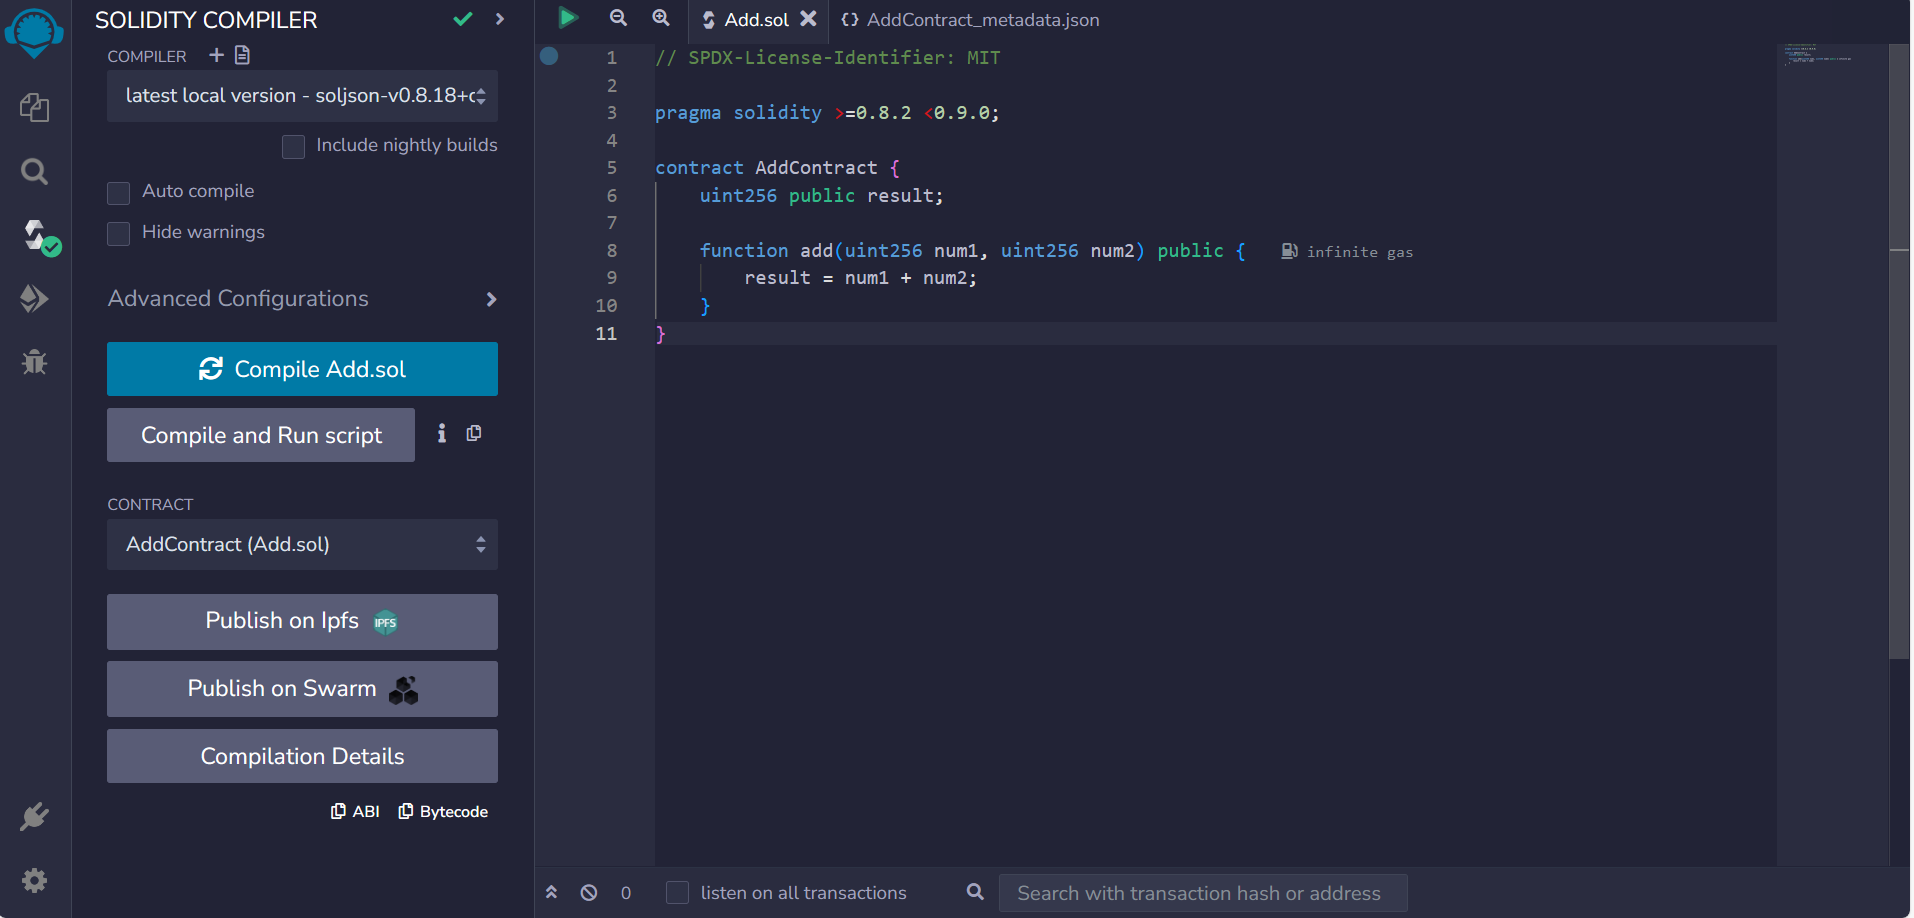

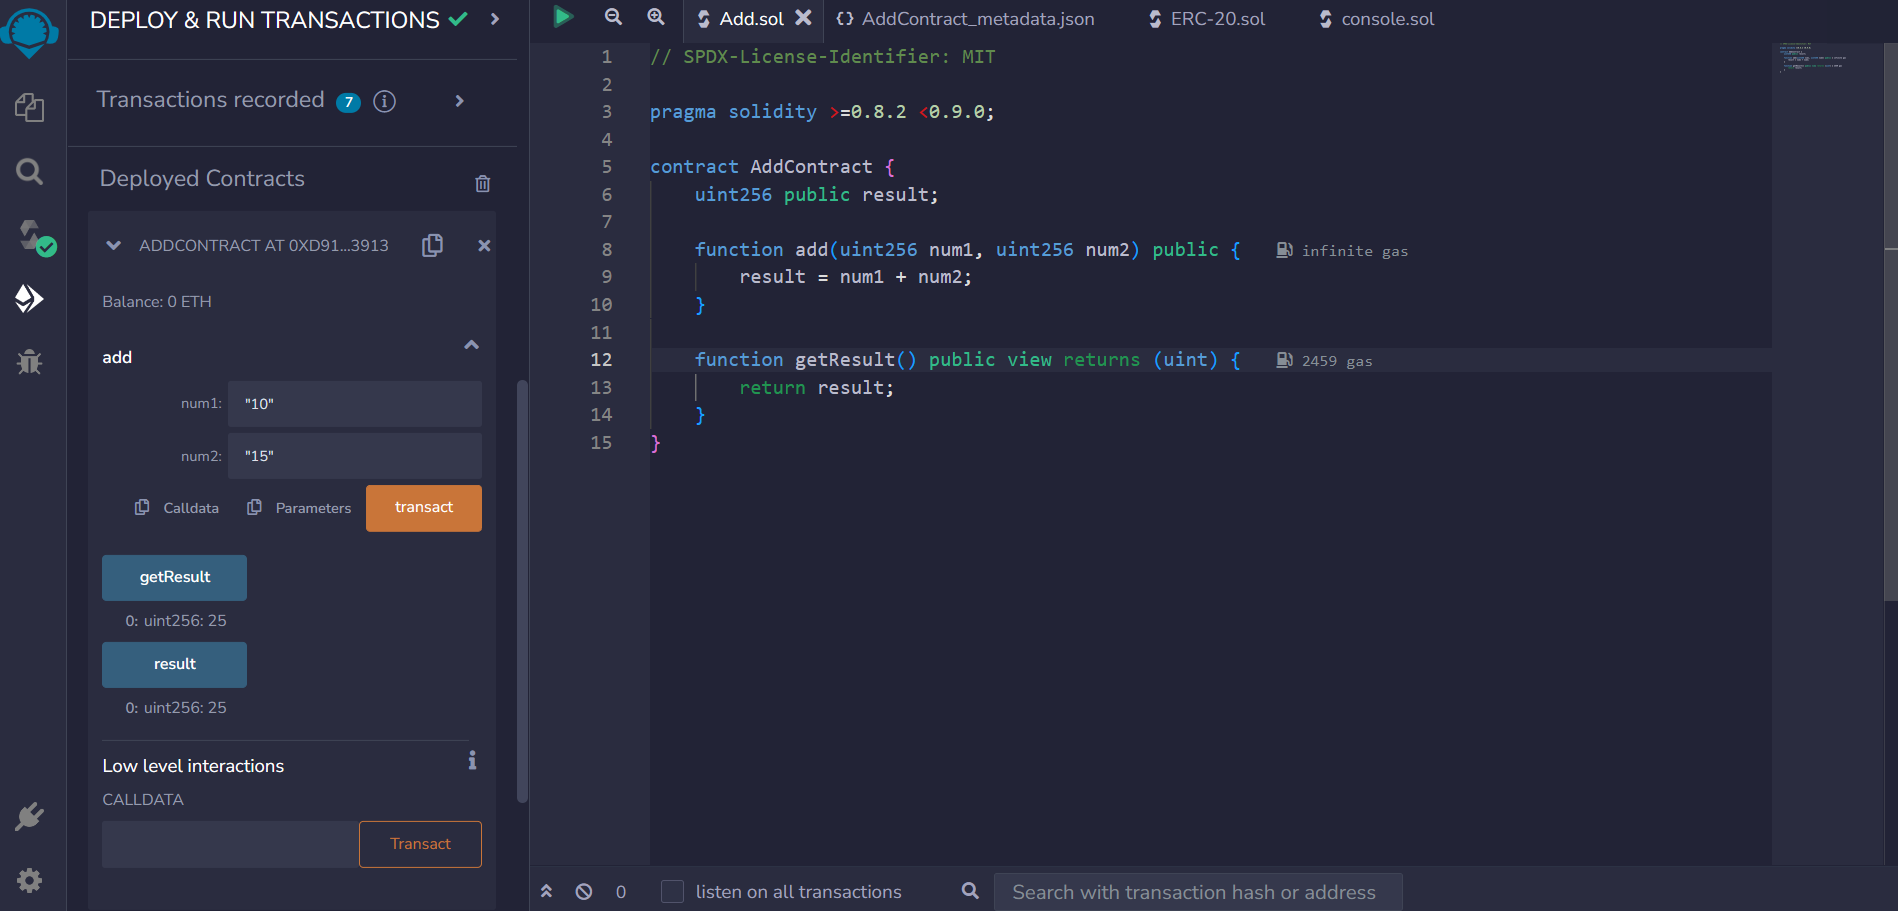

### Task 6 (3 points)

Create an ERC20 smart contract

a. Create 100 tokens.

In [ ]:
// SPDX-License-Identifier: MIT
pragma solidity >=0.8.2 <0.9.0;

import "@openzeppelin/contracts/token/ERC20/ERC20.sol";

contract MyToken is ERC20 {
    constructor() ERC20("TestToken", "TT") {
        _mint(msg.sender, 100 * 10 ** uint(decimals()));
    }
} 

b. Deploy the contract from address_2. Provide contract creation transaction_id and contract address (the address created when the contract is deployed) and a 3-letter abbreviation of your coin. We will check the existence of the sepolia testnet.

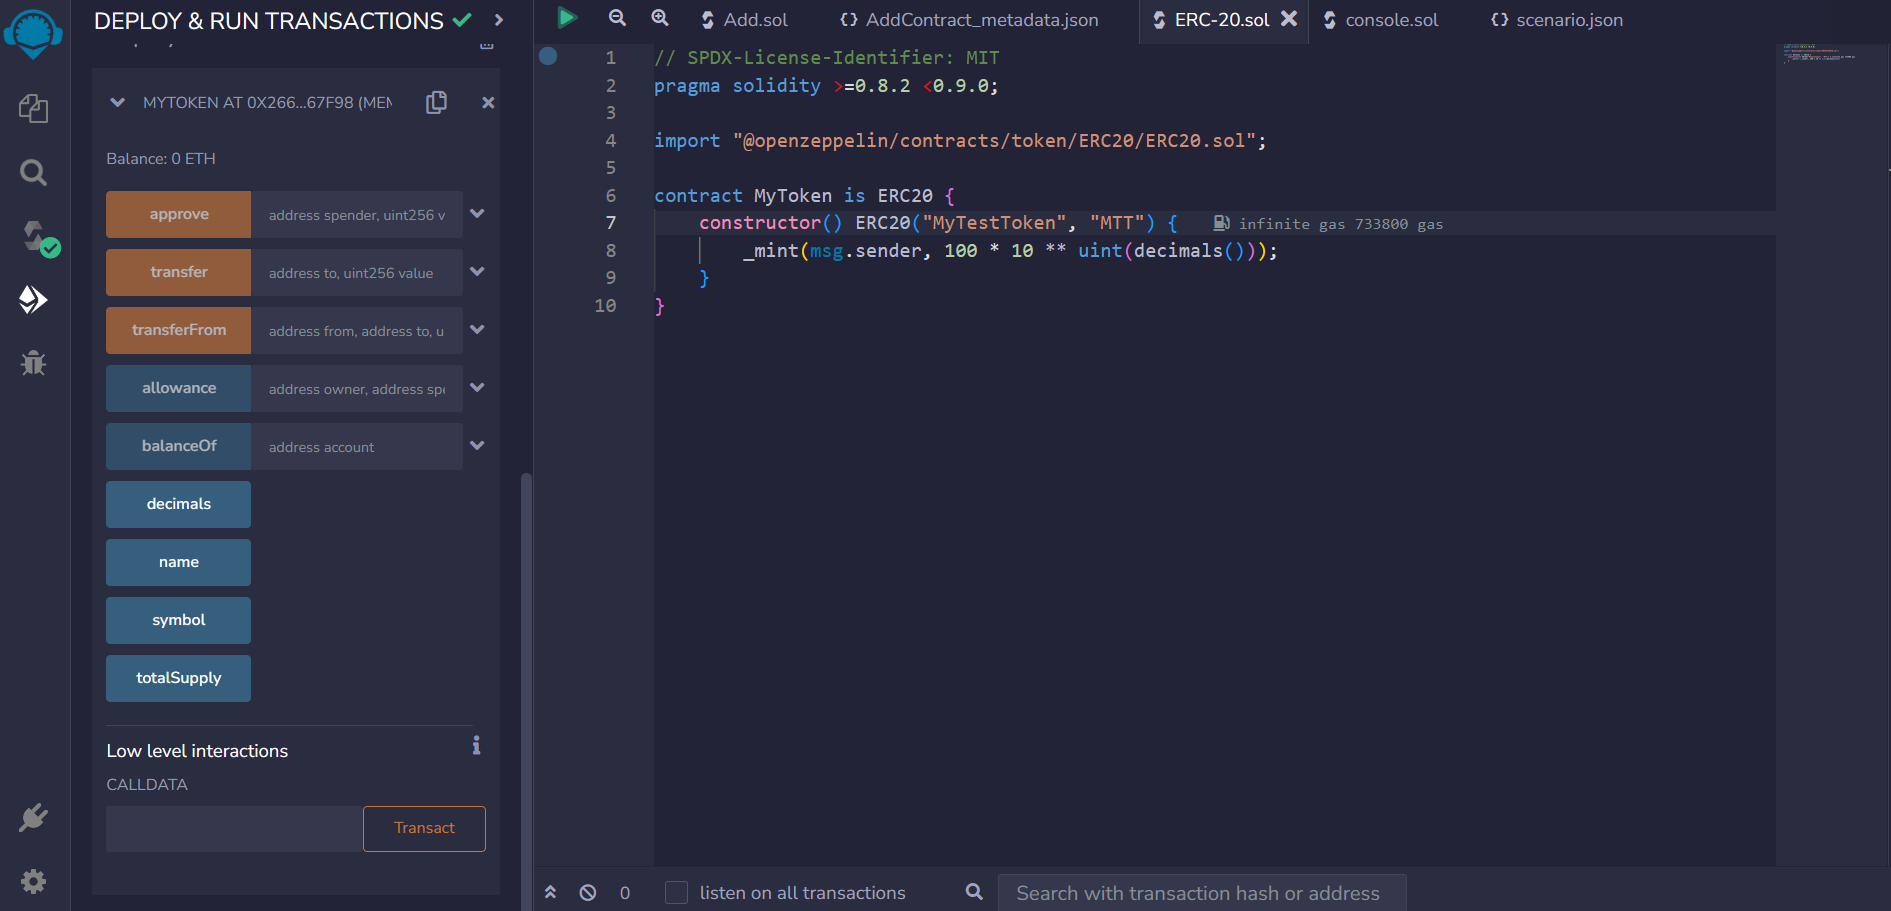

c. Send ten tokens to 0x80773c866332a7f3CFdD583d0b3A96655F035d6C address. (Provide Transaction Id)

0x82a28614ce1e7278ad249e610a3beb806db655ad4c39ade70b48305ce27cbde6